# Timesteps Size Management

Created by Benoit Côté

This notebook presents the different options available in NuPyCEE to define the size of the timesteps. All options described below can be used in SYGMA and OMEGA.

In [1]:
# Import python modules and the OMEGA code
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from NuPyCEE import sygma
from NuPyCEE import omega

## 1. Special Timesteps

This is the **default setup**. The size of timesteps is set to increase linearly with time (in the log-log space). This is motivated by the fast initial enrichment in chemical evolution models during the first Gyr of evolution.

**Relevant parameters**
* *special_timesteps*
    * Number of timesteps
    * Default value: 30
* *tend*
    * Duration of the simulation [yr]
    * Default value: 1.3e10
* *dt*
    * Size of the very first timestep [yr]
    * Default value: 1.0e6

In [2]:
# Let's run an OMEGA simulation with the default setting
o_default = omega.omega(mgal=1e11, special_timesteps=30)

OMEGA run in progress..
   OMEGA run completed - Run time: 0.67s


<IPython.core.display.Javascript object>


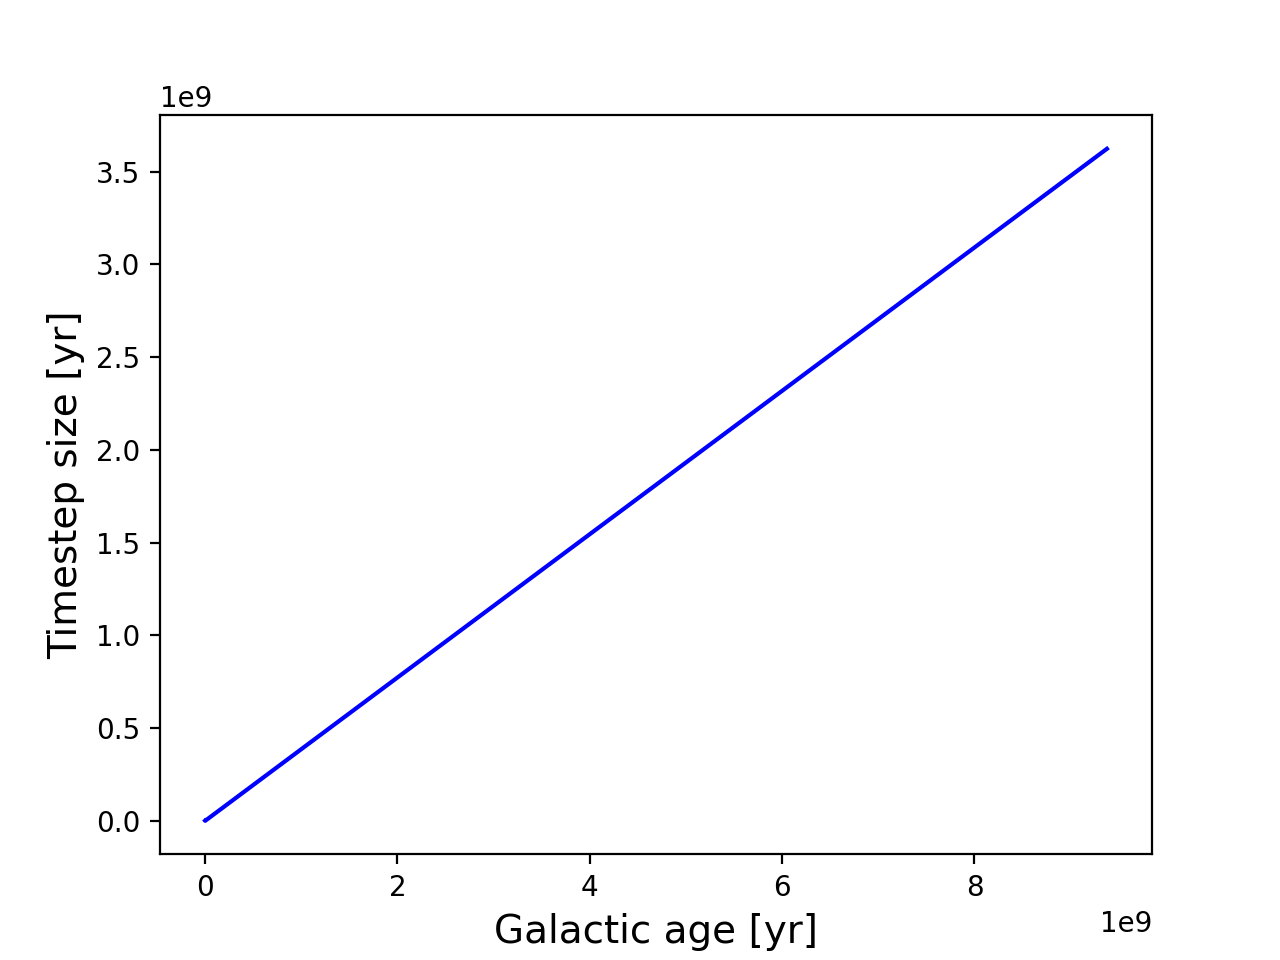

Text(0, 0.5, 'Timestep size [yr]')

In [4]:
# Let's plot the size of the timesteps as a function of time
%matplotlib nbagg
plt.plot(o_default.history.age[:-1], o_default.history.timesteps, color='b')
# Above, the [:-1] is because the "age" array has an additional index (or cell)
# compared to the "timesteps" array. The [:-1] allows to exclude the last
# index of an array.

# Plot X and Y labels
plt.xlabel('Galactic age [yr]', fontsize=14)
plt.ylabel('Timestep size [yr]', fontsize=14)

In [5]:
# Let's run another simulation with 3 times more timesteps
o_special_3x = omega.omega(mgal=1e11, special_timesteps=90)

OMEGA run in progress..
   OMEGA run completed - Run time: 1.06s


Has shown in the plot below, increasing the number of timesteps will change the slope of the timestep-size-VS-time relation.

<IPython.core.display.Javascript object>


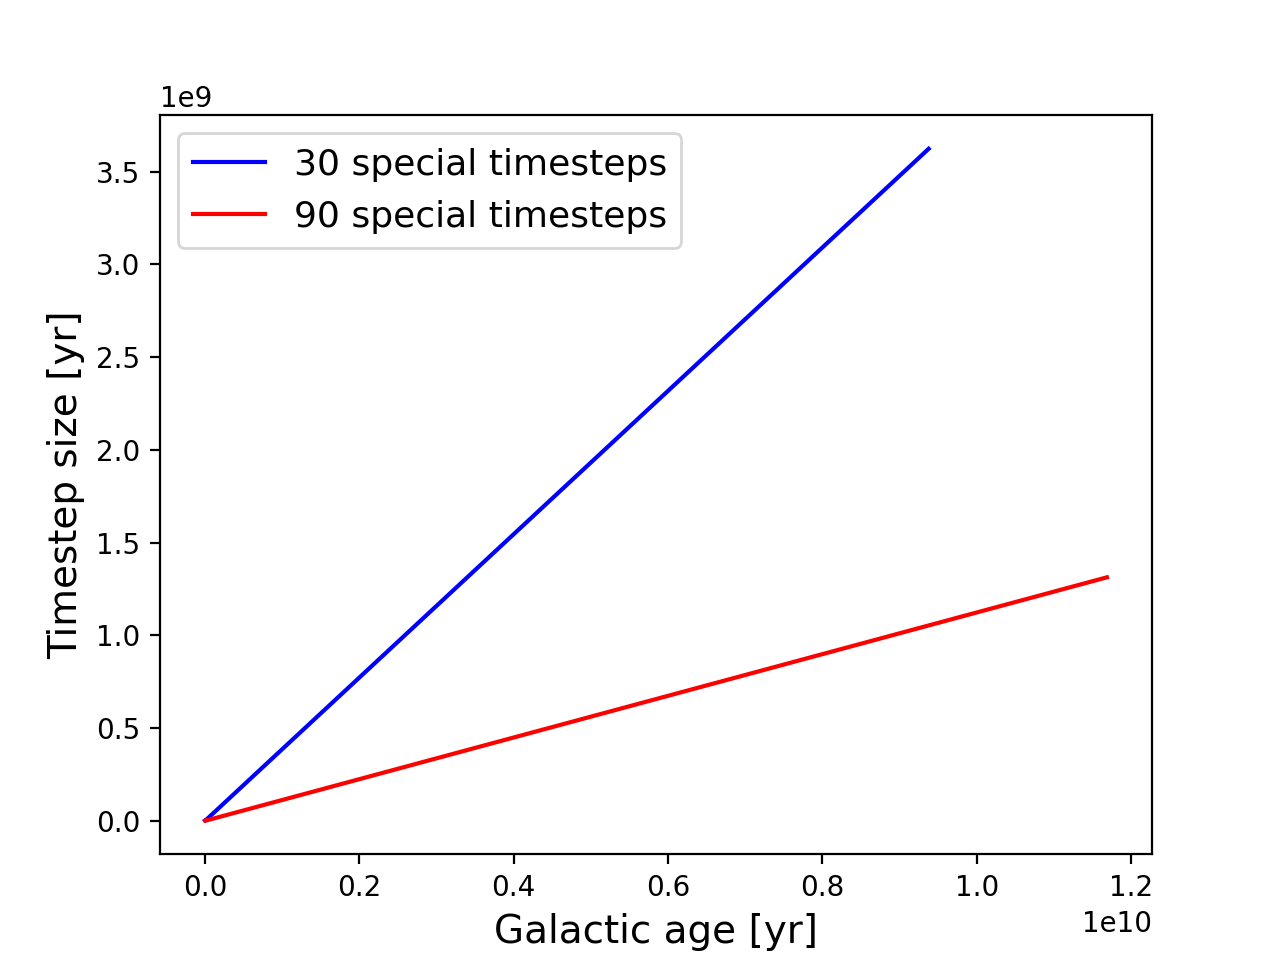

In [6]:
# Let's plot the size of the timesteps as a function of time
%matplotlib nbagg
plt.plot(o_default.history.age[:-1],    o_default.history.timesteps,    color='b', label='30 special timesteps')
plt.plot(o_special_3x.history.age[:-1], o_special_3x.history.timesteps, color='r', label='90 special timesteps')

# Plot X and Y labels and the legend
plt.xlabel('Galactic age [yr]', fontsize=14)
plt.ylabel('Timestep size [yr]', fontsize=14)
plt.legend(loc=2, fontsize=13)

When using more timesteps (red line), the size of the timesteps is decreasing in order to respect the final time of the simulation, which is defined with the *tend* parameter. When looking at the evolution of the gas, more timesteps provide more resolution, as shown by the dots in the plot below.

<IPython.core.display.Javascript object>


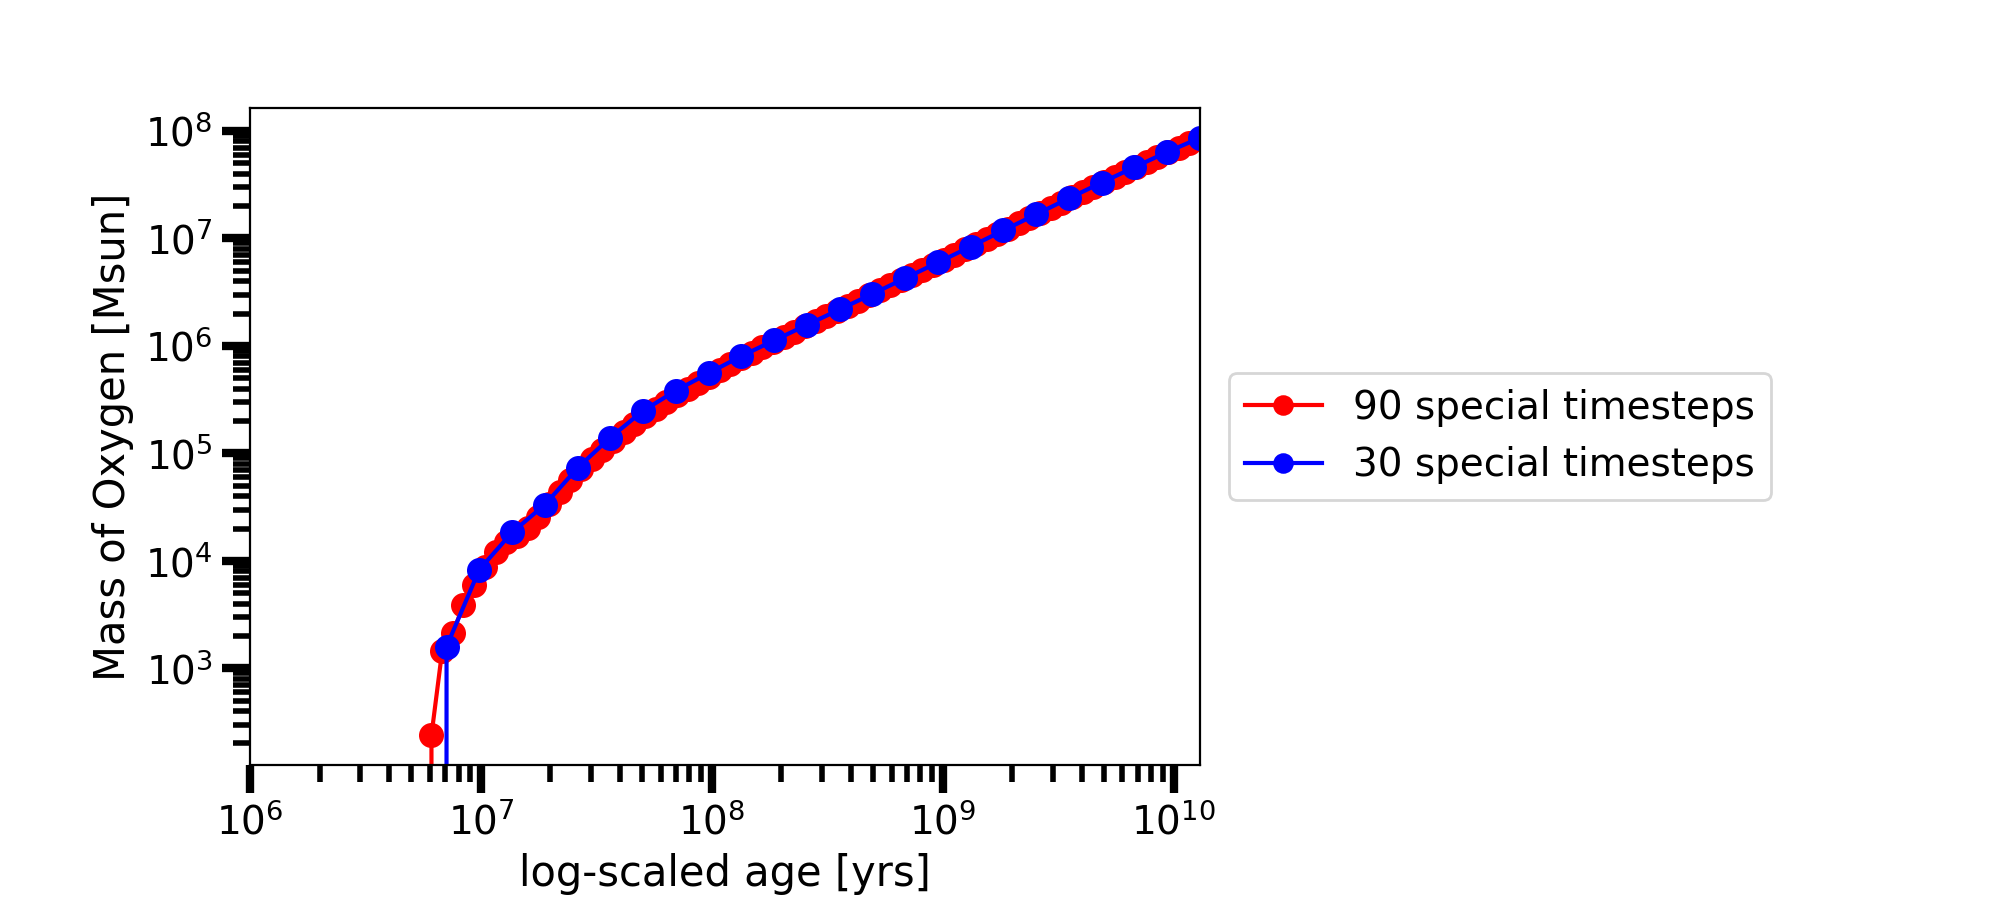

Text(0, 0.5, 'Mass of Oxygen [Msun]')

In [8]:
# Let's plot the evolution of the total mass of oxygen in the gas reservoir
%matplotlib nbagg
specie = 'O'
o_special_3x.plot_mass(specie=specie, color='r', markevery=1, label='90 special timesteps')
o_default.plot_mass(   specie=specie, color='b', markevery=1, label='30 special timesteps')
plt.ylabel('Mass of Oxygen [Msun]')

## 2. Constant Timesteps

**To activate** the constant timestep mode, ** *special_timesteps* needs to be set to -1**.

**Relevant parameters**
* *dt*
    * Size of all timesteps [yr]
    * Default value: 1.0e6
* *tend*
    * Duration of the simulation [yr]
    * Default value: 1.3e10

In [9]:
# Let's run two OMEGA simulations with different constant timesteps
o_cte_1 = omega.omega(mgal=1e11, special_timesteps=-1, dt=5e8)
o_cte_2 = omega.omega(mgal=1e11, special_timesteps=-1, dt=1e8)

OMEGA run in progress..
   OMEGA run completed - Run time: 0.66s
OMEGA run in progress..
   OMEGA run completed - Run time: 1.69s


<IPython.core.display.Javascript object>


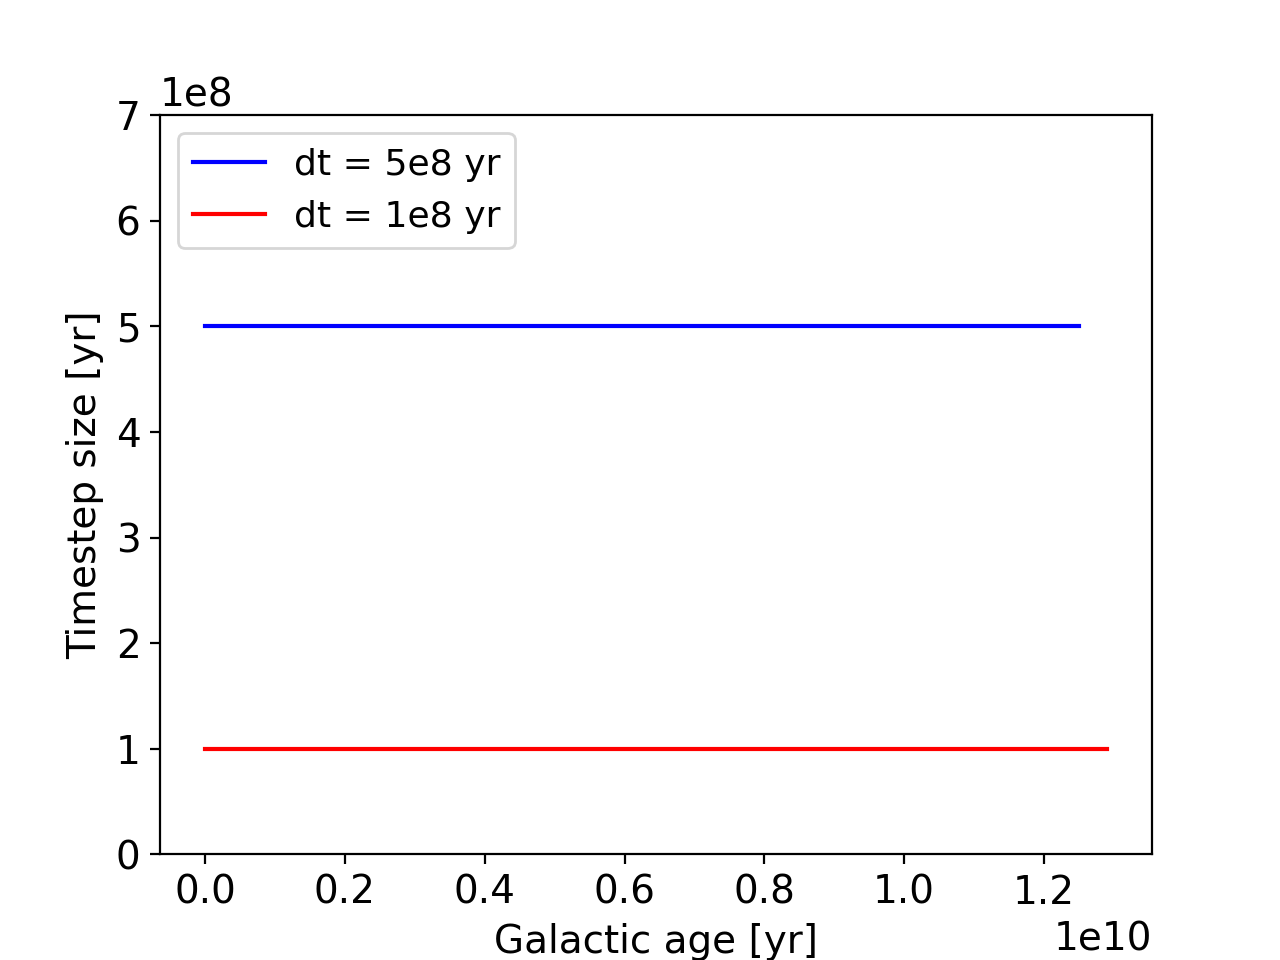

(0.0, 700000000.0)

In [10]:
# Let's plot the size of the timesteps as a function of time
%matplotlib nbagg
plt.plot(o_cte_1.history.age[:-1], o_cte_1.history.timesteps, color='b', label='dt = 5e8 yr')
plt.plot(o_cte_2.history.age[:-1], o_cte_2.history.timesteps, color='r', label='dt = 1e8 yr')

# Plot X and Y labels and the legend
plt.xlabel('Galactic age [yr]', fontsize=14)
plt.ylabel('Timestep size [yr]', fontsize=14)
plt.legend(loc=2, fontsize=13)
plt.ylim(0,7e8)

## 3. Split Info Timesteps

This option allows to create different series of constant timesteps in different timeframes. **To activate, simply use the *dt_split_info* parameter**. This will pybass the options 1 and 2 described above and the option 4 described bellow. **Warning**, the duration of the simulation depends on the content of the *dt_split_info* parameter, the *tend* parameter cannot be used.

**Relevant parameters**
* *dt_split_info*
    * Numpy array containing the information to create the timestep array (see below)
    * Default value: np.array([]), deactivated

In [11]:
# Let's create a first set of information
dt_split_info_1 = [ [1e6,4e7], [5e8,13e9] ]
# This means the timesteps will be of 1 Myr until the time reaches 40 Myr,
# after which the timesteps will be of 500 Myr until the time reaches 13 Gyr.

# Let's create a second set of information
dt_split_info_2 = [ [5e7,1e8], [1e7,2e8], [1e8, 1e9], [2e8,5e9] ]

In [12]:
# Let's run OMEGA simulation swith "dt_split_info" and look at the timestep sizes
o_dt_split_1 = omega.omega(mgal=1e11, dt_split_info=dt_split_info_1)
o_dt_split_2 = omega.omega(mgal=1e11, dt_split_info=dt_split_info_2)

OMEGA run in progress..
   OMEGA run completed - Run time: 0.88s
OMEGA run in progress..
   OMEGA run completed - Run time: 0.75s


<IPython.core.display.Javascript object>


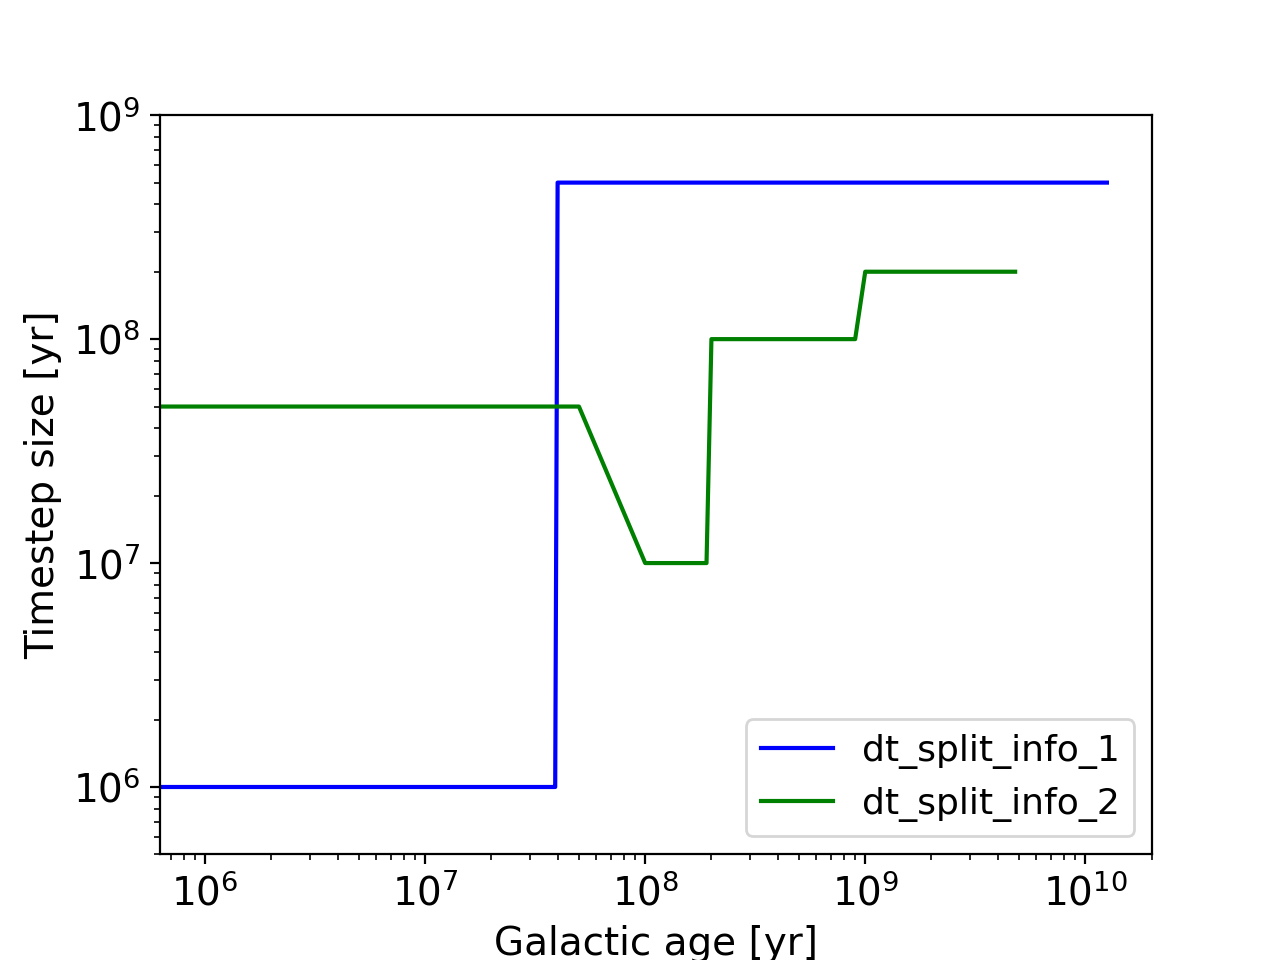

(500000.0, 1000000000.0)

In [13]:
# Let's plot the size of the timesteps as a function of time
%matplotlib nbagg
plt.plot(o_dt_split_1.history.age[:-1], o_dt_split_1.history.timesteps, color='b', label='dt_split_info_1')
plt.plot(o_dt_split_2.history.age[:-1], o_dt_split_2.history.timesteps, color='g', label='dt_split_info_2')

# Plot X and Y labels and the legend
plt.xlabel('Galactic age [yr]', fontsize=14)
plt.ylabel('Timestep size [yr]', fontsize=14)
plt.legend(loc=4, fontsize=13)
plt.yscale('log')
plt.xscale('log')
plt.ylim(5e5,1e9)

<IPython.core.display.Javascript object>


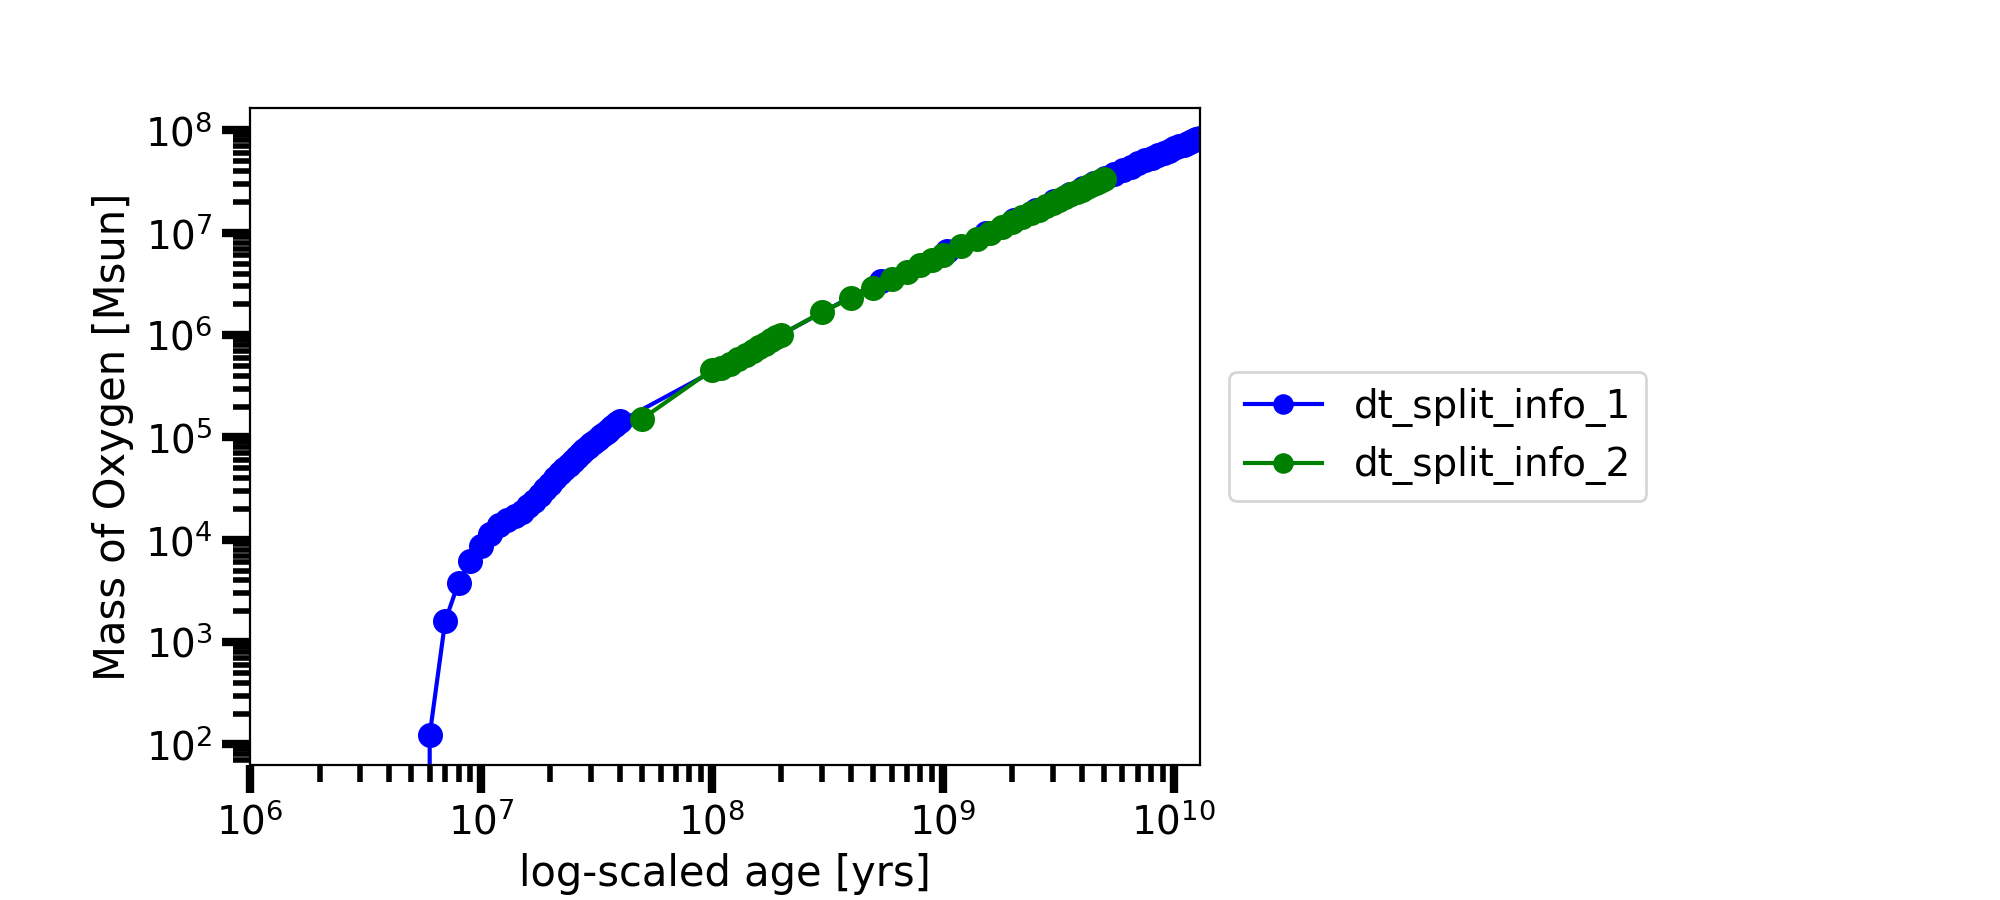

Text(0, 0.5, 'Mass of Oxygen [Msun]')

In [14]:
# Now let's look at the evolution of the total mass of oxygen
%matplotlib nbagg
specie = 'O'
o_dt_split_1.plot_mass(specie=specie, color='b', markevery=1, label='dt_split_info_1')
o_dt_split_2.plot_mass(specie=specie, color='g', markevery=1, label='dt_split_info_2')
plt.ylabel('Mass of Oxygen [Msun]')

# 4. Arbitrary Timesteps

This option allows to enter by hand the size of the timesteps. **To activate, use the *dt_in* parameter.** The sizes of the timesteps can be any numbers in any order. **Warnings**, this option bypass the options 1 and 2, but not the option 3. The duration of the simulation is defined by the sum of input timestep sizes, the *tend* parameter cannot be used.

**Relevant parameters**
* *dt_in*
    * List of timestep sizes
    * Default value: np.array([]), deactivated

In [15]:
# Let's create two sets of arbitraty timesteps
dt_in_1 = [1e8, 1e9, 2e9, 4e9, 5e9]
dt_in_2 = [5e8, 1e7, 5e7, 1e8, 1e5, 4.65e6, 3.019e8, 4e9, 1e9]

In [16]:
# Let's run OMEGA simulation swith "dt_in" and look at the timestep sizes
o_arb_1 = omega.omega(mgal=1e11, dt_in=dt_in_1)
o_arb_2 = omega.omega(mgal=1e11, dt_in=dt_in_2)

OMEGA run in progress..
   OMEGA run completed - Run time: 0.53s
OMEGA run in progress..
   OMEGA run completed - Run time: 0.53s


<IPython.core.display.Javascript object>


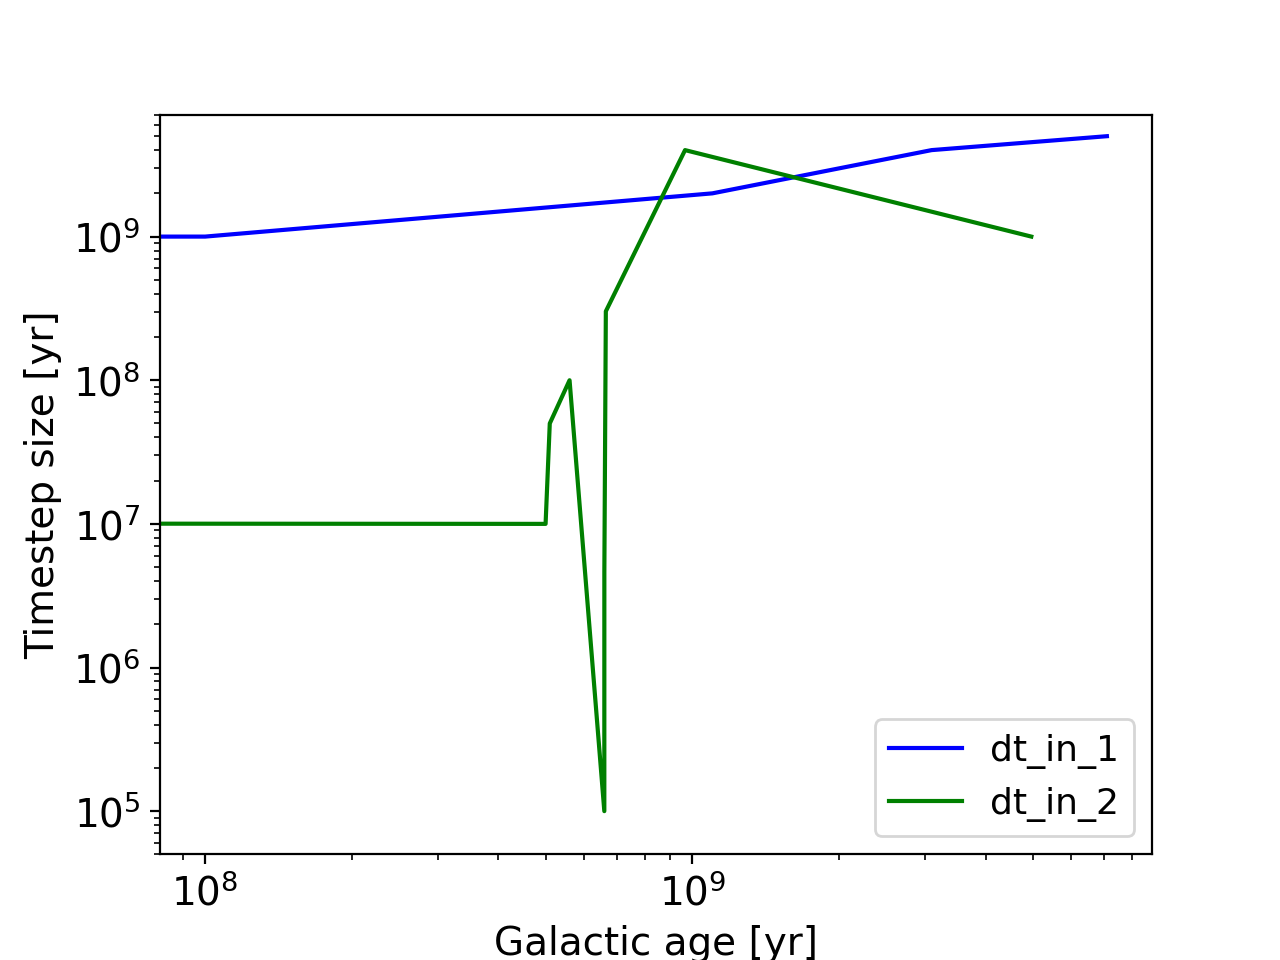

(50000.0, 7000000000.0)

In [17]:
# Let's plot the size of the timesteps as a function of time
%matplotlib nbagg
plt.plot(o_arb_1.history.age[:-1], o_arb_1.history.timesteps, color='b', label='dt_in_1')
plt.plot(o_arb_2.history.age[:-1], o_arb_2.history.timesteps, color='g', label='dt_in_2')

# Plot X and Y labels and the legend
plt.xlabel('Galactic age [yr]', fontsize=14)
plt.ylabel('Timestep size [yr]', fontsize=14)
plt.legend(loc=4, fontsize=13)
plt.yscale('log')
plt.xscale('log')
plt.ylim(5e4,7e9)

<IPython.core.display.Javascript object>


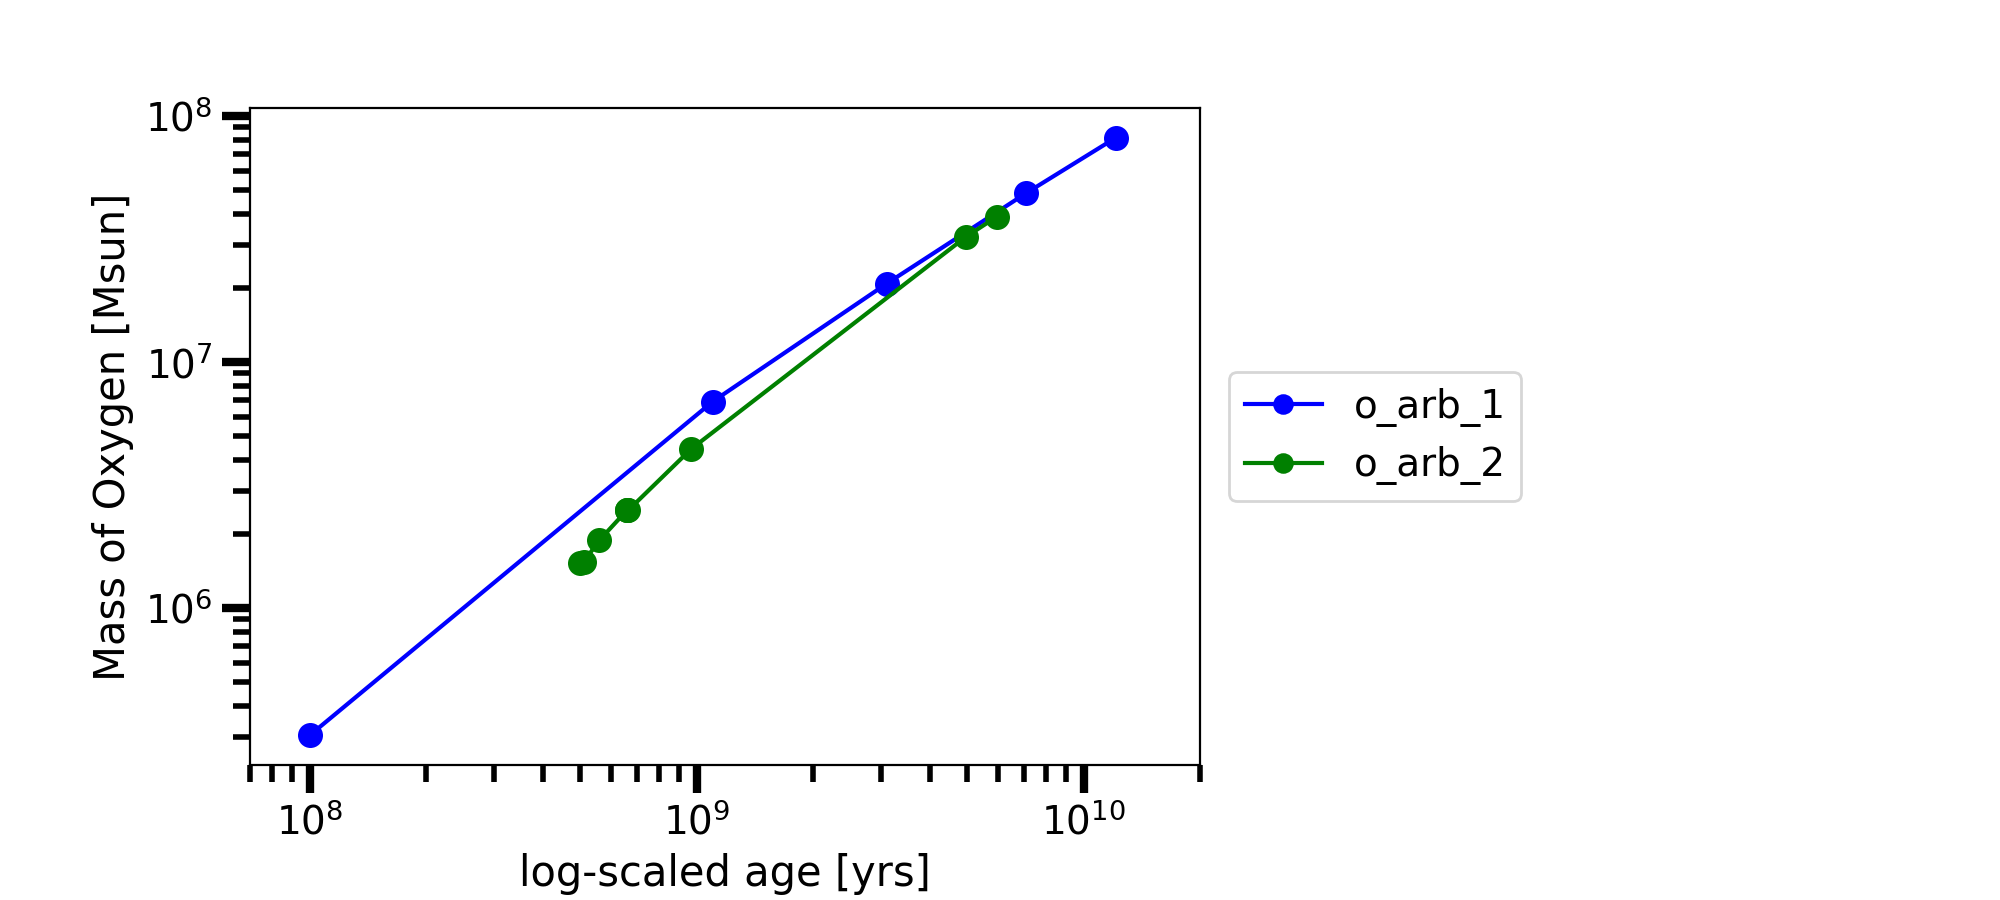

(70000000.0, 20000000000.0)

In [18]:
# Now let's look at the evolution of the total mass of oxygen
%matplotlib nbagg
specie = 'O'
o_arb_1.plot_mass(specie=specie, color='b', markevery=1, label='o_arb_1')
o_arb_2.plot_mass(specie=specie, color='g', markevery=1, label='o_arb_2')
plt.ylabel('Mass of Oxygen [Msun]')
plt.xlim(7e7,2e10)